In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = [col for col in df.columns if col not in numerical_cols]

df[numerical_cols].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [3]:
df[categorical_cols].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [4]:
df[numerical_cols].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [5]:
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df[numerical_cols])
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols)
df[numerical_cols] = imputed_df
df[numerical_cols].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [6]:
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']
df = df.drop('PassengerId', axis=1)

df[numerical_cols].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


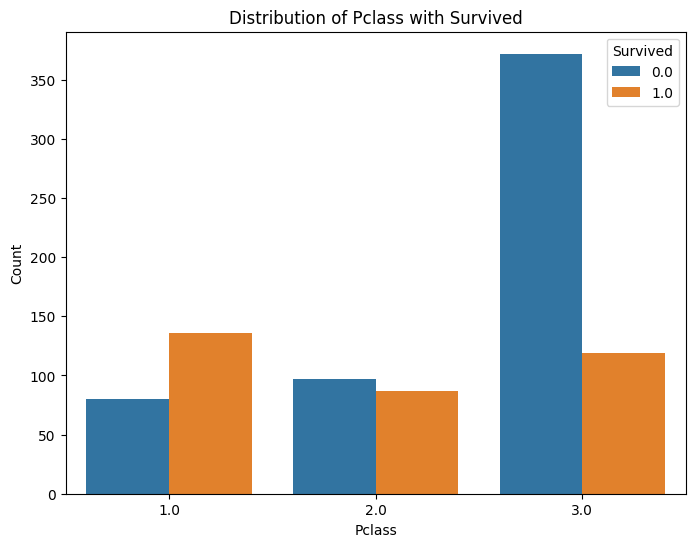

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Distribution of Pclass with Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [8]:
df['Age'].skew()

0.3839910000750233

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


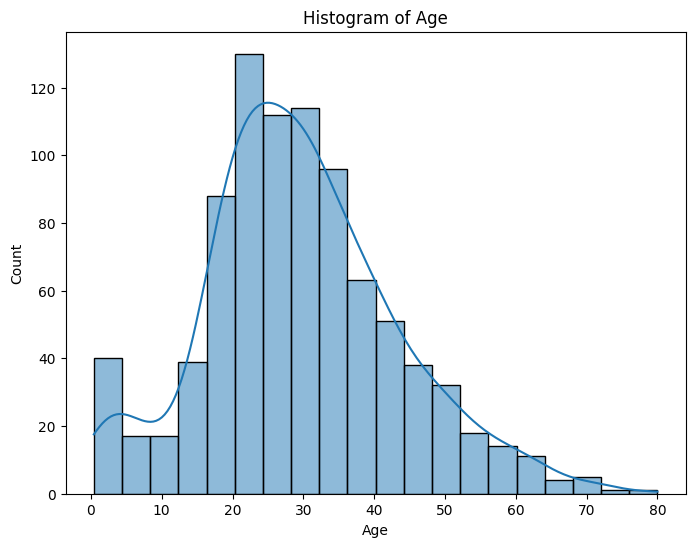

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

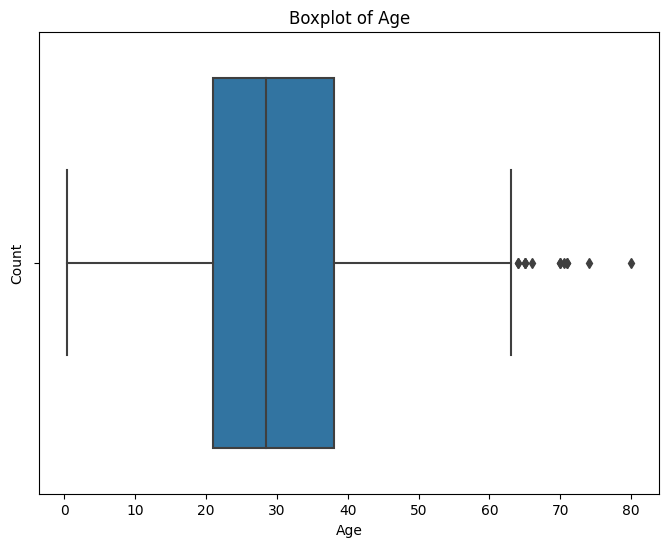

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
df['Fare'].skew()

4.787316519674893

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


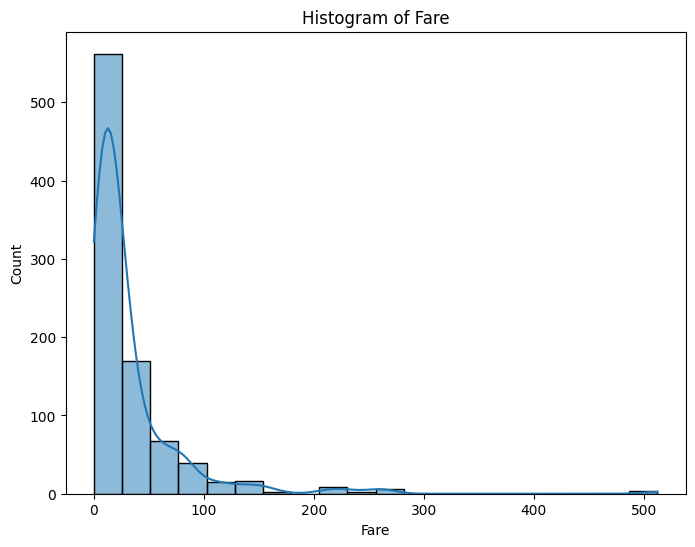

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

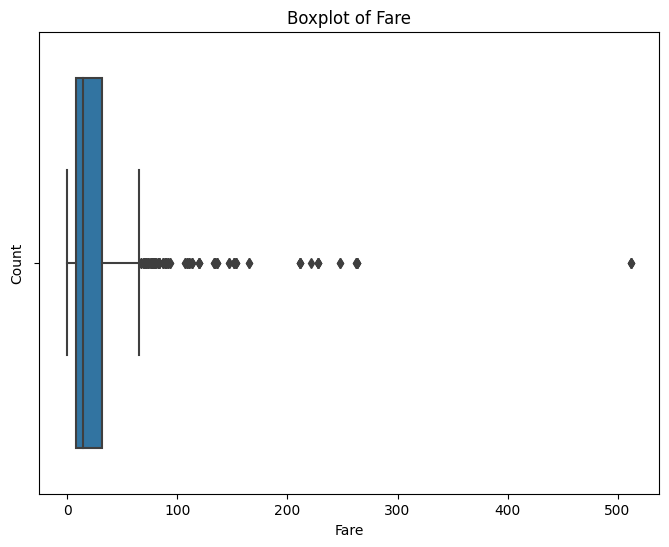

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=df)
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [14]:
df[df['Fare']>=450]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1.0,1.0,"Ward, Miss. Anna",female,35.0,0.0,0.0,PC 17755,512.3292,NaN,C
679,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C
737,1.0,1.0,"Lesurer, Mr. Gustave J",male,35.0,0.0,0.0,PC 17755,512.3292,B101,C


In [15]:
df['Fare'] = np.cbrt(df['Fare'])
df['Fare'].skew() 

1.2303822111719211

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


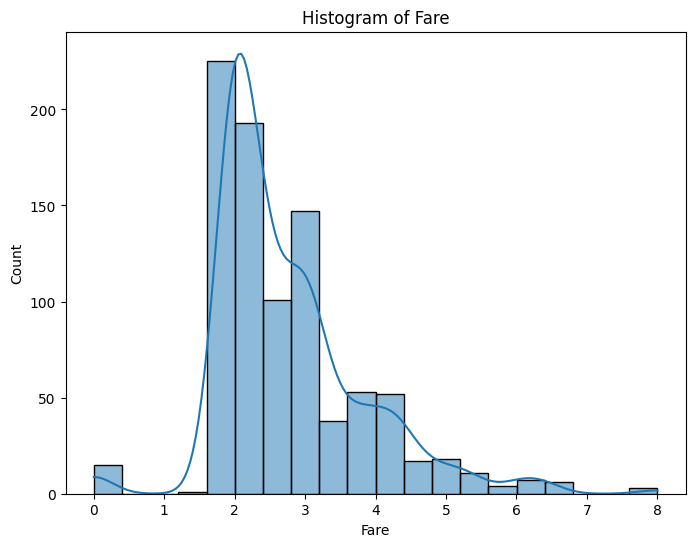

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

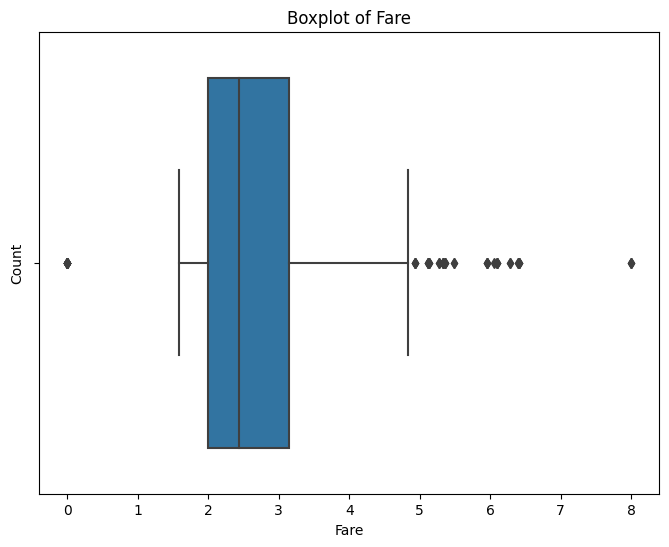

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=df)
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [18]:
df['Sex'] = df['Sex'].map({
    'male':1,
    'female':0
})

df['Embarked'] = df['Embarked'].map({
    'S':1,
    'C':2,
    'Q':3
})

df[categorical_cols].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [19]:
categorical_cols = [col for col in categorical_cols if col == 'Sex' or col == 'Embarked']
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df[categorical_cols].head()

,Sex,Embarked
0,1,1.0
1,0,2.0
2,0,1.0
3,0,1.0
4,1,1.0


In [20]:
df = df.dropna(subset=['Embarked'])
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

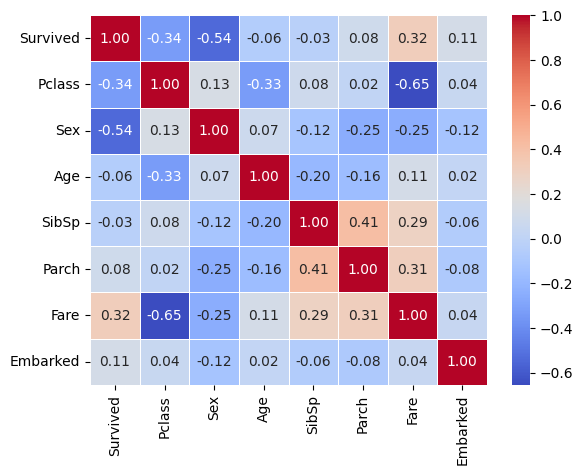

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', annot=True, linewidths=.5)
plt.show()

In [22]:
df = df[['Pclass', 'Sex', 'Fare', 'Survived']]
df.head()

,Pclass,Sex,Fare,Survived
0,3.0,1,1.935438,0.0
1,1.0,0,4.146318,1.0
2,3.0,0,1.993730,1.0
3,1.0,0,3.758647,1.0
4,3.0,1,2.004158,0.0
